In [32]:
# Collecting the data
import pandas as pd

df = pd.read_csv("D:\JOB\Projects\Student Performace project\student+performance\student\student-mat.csv",sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [33]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

df['target'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

cat_cols = df.select_dtypes(include = 'object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,target
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1


In [39]:
# Spliting the data into train and test
from  sklearn.model_selection import train_test_split

x = df.drop(['G3','target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [40]:
# Train Ml Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'DecTree': DecisionTreeClassifier(max_depth=5),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),  # Support Vector Machine
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.2f}")

from sklearn.metrics import f1_score, confusion_matrix

print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    


LogReg Evaluation:
Accuracy : 0.95
Precision: 0.98
Recall   : 0.94

DecTree Evaluation:
Accuracy : 0.92
Precision: 0.96
Recall   : 0.92

RandomForest Evaluation:
Accuracy : 0.91
Precision: 0.96
Recall   : 0.90

SVM Evaluation:
Accuracy : 0.89
Precision: 0.91
Recall   : 0.92

NaiveBayes Evaluation:
Accuracy : 0.87
Precision: 0.89
Recall   : 0.92

KNN Evaluation:
Accuracy : 0.90
Precision: 0.92
Recall   : 0.92
F1 Score: 0.92
Confusion Matrix:
 [[23  4]
 [ 4 48]]


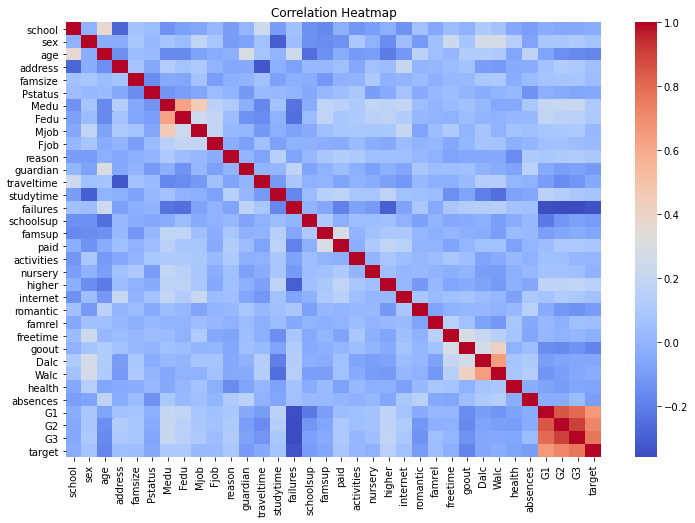

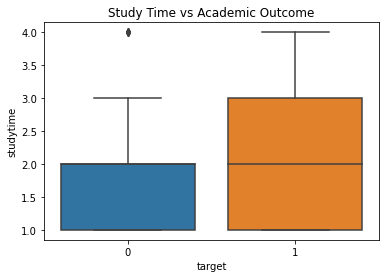

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Visualize pass/fail by study time
sns.boxplot(x='target', y='studytime', data=df)
plt.title("Study Time vs Academic Outcome")
plt.show()